In [1]:
import tensorflow as tf

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [8]:
# load the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print('x_train.shape:', x_train.shape)

4422102/4422102 [==============================] - 1s 0us/step
x_train.shape: (60000, 28, 28)


In [9]:
# the data is only 2D
# convolution expects height x width x color, add a tensor in last position to fix this
x_train = np.expand_dims(x_train, -1)
x_trset = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [11]:
# number of classes using the set data structure
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [12]:
# build model using functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i) # conv layer 1, stride=2 images twice small after each layer
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x) # conv layer 2
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x) # conv layer 3
x = Flatten()(x) # converts the image into a feature vector
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [15]:
# compile and fit
# use the GPU
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.5186 - accuracy: 0.8089 - val_loss: 0.3946 - val_accuracy: 0.8504
Epoch 2/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3613 - accuracy: 0.8647 - val_loss: 0.3564 - val_accuracy: 0.8676
Epoch 3/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3098 - accuracy: 0.8818 - val_loss: 0.3155 - val_accuracy: 0.8813
Epoch 4/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2770 - accuracy: 0.8963 - val_loss: 0.2977 - val_accuracy: 0.8920
Epoch 5/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2490 - accuracy: 0.9055 - val_loss: 0.3049 - val_accuracy: 0.8905
Epoch 6/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2251 - accuracy: 0.9155 - val_loss: 0.2929 - val_accuracy: 0.8942
Epoch 7/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2076 - accuracy: 0.9208 - val_loss: 0.3077 -

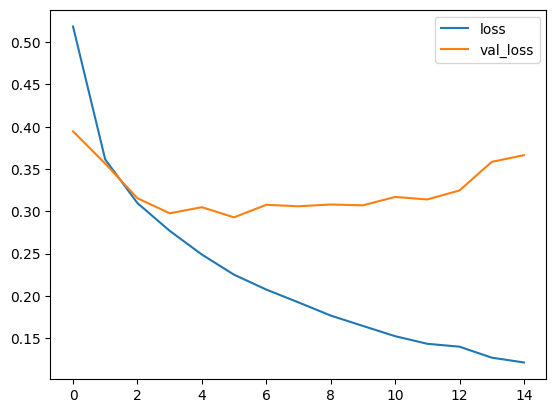

In [16]:
# plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

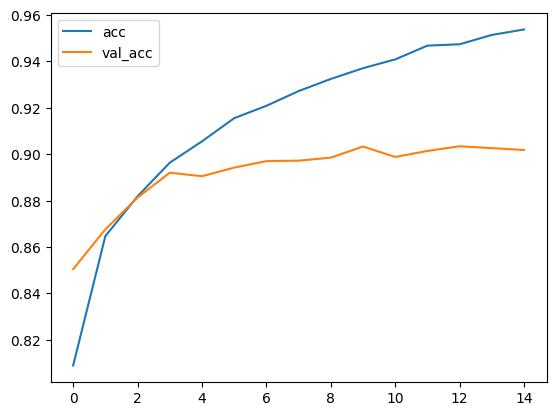

In [17]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

313/313 [==============================] - 2s 5ms/step
Confusion matrix, whitout normalization
[[817   1  20  25   7   2 121   0   7   0]
 [  1 974   2  16   2   0   3   0   2   0]
 [ 15   0 829  17  52   0  85   0   2   0]
 [ 13   2  12 930  19   1  21   0   2   0]
 [  0   0  59  29 857   0  54   0   1   0]
 [  0   0   0   0   0 977   0  20   0   3]
 [ 76   0  50  26  89   1 738   1  19   0]
 [  0   0   0   0   0   7   0 981   0  12]
 [  1   0   7   3   4   1   8   4 972   0]
 [  1   0   0   0   0   9   0  47   0 943]]


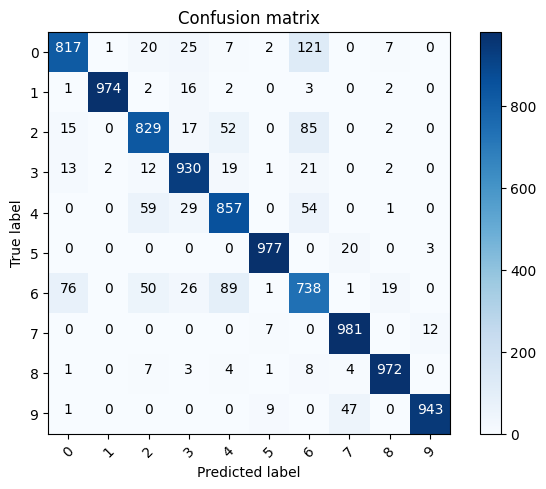

In [22]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting "normalize=True".
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, whitout normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment='center',
              color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm, list(range(10)))



In [23]:
# label mapping
labels = '''T-shirt/top
Trousers
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

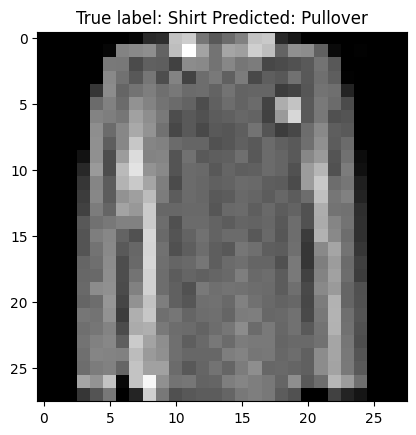

In [31]:
# shoe some missclassified examples
missclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));